In [1]:
import rustworkx as rx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from rustworkx.visualization import graphviz_draw, mpl_draw

In [18]:
NS_PURPLE = "#8e44ad"
NS_GREEN  = "#2ecc71"
plt.rcParams['figure.figsize'] = (3, 2)
plt.rcParams.update({
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.edgecolor": "0.3",
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
})


In [151]:
import networkx as nx
import rustworkx as rx


def convert_rustworkx_to_networkx(graph):
    """Convert a rustworkx PyGraph or PyDiGraph to a networkx graph."""
    edge_list = [(
        graph[x[0]], graph[x[1]],
        {'weight': x[2]}) for x in graph.weighted_edge_list()]

    if isinstance(graph, rx.PyGraph):
        if graph.multigraph:
            return nx.MultiGraph(edge_list)
        else:
            return nx.Graph(edge_list)
    else:
        if graph.multigraph:
            return nx.MultiDiGraph(edge_list)
        else:
            return nx.DiGraph(edge_list)

# Chapter 2 - Graph Theory
---------------------------

### 2.3 Degree, Average Degree and Degree Distribution
-----------------------------------------------------------

#### 2.3.1 Degree

In [520]:
# empty graph
G = rx.PyGraph()

# define nodes and edges
nodes = [0, 1, 2, 3]
edges = [(0,1), (1, 2,), (1, 3), (2, 3)]

G.add_nodes_from(nodes)
G.add_edges_from_no_data(edges)
print(f"Graph has {G.num_nodes()} nodes and {G.num_edges()} edges")

Graph has 4 nodes and 4 edges


In [521]:
def pprint(G):
    return print(f"Graph has {G.num_nodes()} nodes and {G.num_edges()} edges")

In [522]:
pprint(G)

Graph has 4 nodes and 4 edges


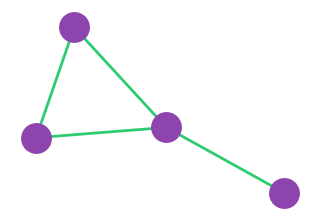

In [19]:
mpl_draw(G, node_color=NS_PURPLE, node_size=450, edge_color=NS_GREEN, width=2)

Degree:
$L = \frac{1}{2} \sum_{i=1}^{N} k_i$

where $k_i$ is the degree of the $ith$ node in a network

In [523]:
L = 0
for node in G.node_indices():
    L += G.degree(node)

L *= .5
print(L)

4.0


In [524]:
assert L == G.num_edges()

In [186]:
rx.adjacency_matrix(G).sum() * .5

np.float64(4.0)

##### A graph can be represented as an adjacency matrix.

In [187]:
print(rx.adjacency_matrix(G))

[[0. 1. 0. 0.]
 [1. 0. 1. 1.]
 [0. 1. 0. 1.]
 [0. 1. 1. 0.]]


In [189]:
np.sum(rx.adjacency_matrix(G)) * .5

np.float64(4.0)

#### 2.3.2 Average Degree

Average Degree:
$<k> = \frac{1}{N} \sum_{i=1}^{N} k_i = \frac{2L}{N}$

where $k_i$ is the degree of the $ith$ node in a network

In [37]:
# nx.Graph.degree() give the node and degree for each node in the graph
L = 0 # total edges
for node in G.node_indices():
    L += G.degree(node)
L *= (1./2)
N = G.num_nodes()
print(L*2/N)

2.0


In [194]:
L = G.num_edges()
N = G.num_nodes()
print(f"Graph G has {L} edges, {N} nodes. The average degree is {2 * L/N}")

Graph G has 4 edges, 4 nodes. The average degree is 2.0


#### 2.3.3 Degree Distribution

##### The degree distribution is pk and is the probability that a randomly selected node in the network has degree k

$\sum_{i=1}^{inf} p_k = 1$

##### For a network with N nodes the degree distribution is the normalized histogram given by:

$p_k = \frac{N_k}{N}$

##### where ${N_k}$ is the number of degree-k nodes can be obtained from the degree distribution as ${N_k} = {Np_k}$

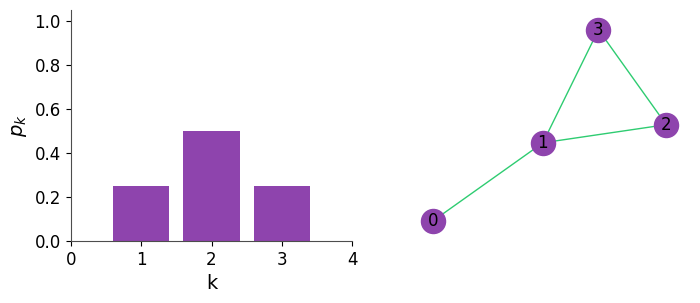

In [519]:
G = rx.PyGraph()
G.add_nodes_from([i for i in range(4)])
G.add_edges_from_no_data([(0, 1), (1, 2), (1, 3), (2, 3)])

degrees = [G.degree(n) for n in G.node_indices()]
vals, counts = np.unique(degrees, return_counts=True)
pk = counts / counts.sum()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
ax1.bar(vals, pk, width=0.8, color=NS_PURPLE)
ax1.set_xlabel("k")
ax1.set_ylabel(r"$p_k$")
ax1.set_xlim(0, max(vals) + 1)
ax1.set_ylim(0, 1.05)

mpl_draw(G, ax=ax2, node_color=NS_PURPLE, edge_color=NS_GREEN, with_labels=True)

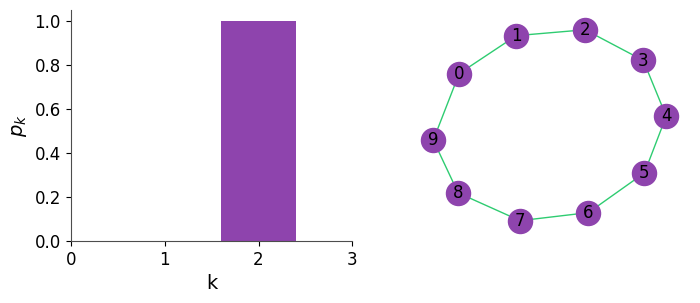

In [516]:
G = rx.generators.cycle_graph(10)

degrees = [G.degree(n) for n in G.node_indices()]
vals, counts = np.unique(degrees, return_counts=True)
pk = counts / counts.sum()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
ax1.bar(vals, pk, width=0.8, color=NS_PURPLE)
ax1.set_xlabel("k")
ax1.set_ylabel(r"$p_k$")
ax1.set_xlim(0, max(vals) + 1)
ax1.set_ylim(0, 1.05)

mpl_draw(G, ax=ax2, node_color=NS_PURPLE, edge_color=NS_GREEN, with_labels=True)

### 2.7 Bipartite Graphs
-----------------------------------------------------------

#### 2.7.1 Generate Graph

##### A bipartite graph (or bigraph) is a network whose nodes can be divided into two disjoint sets U and V such that each link connects a U-node to a V-node. In other words, if we color the U-nodes green and the V-nodes purple, then each link must connect nodes of different colors 

In [391]:
G = rx.PyGraph()

us = G.add_nodes_from(list(range(7)))
vs = G.add_nodes_from(['A', 'B', 'C', 'D'])

edges = [
    (us[0], vs[0]), 
    (us[1], vs[0]),
    (us[2], vs[0]),
    (us[1], vs[1]),
    (us[4], vs[1]),
    (us[3], vs[2]),
    (us[4], vs[2]),
    (us[4], vs[3]),
    (us[5], vs[3]),
    (us[6], vs[3])
]
G.add_edges_from_no_data(edges)

EdgeIndices[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [117]:
rx.is_bipartite(G)

True

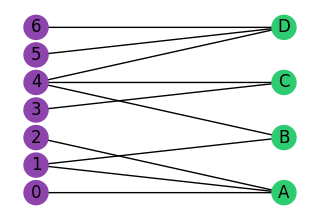

In [116]:
u_color = [NS_PURPLE] * len(us)
v_color = [NS_GREEN] * len(vs)
colors = u_color + v_color
layout = rx.bipartite_layout(G, set(us))

mpl_draw(G, pos=layout, node_color=colors, labels=lambda x: str(x), with_labels=True)

#### 2.7.2 Projections from Bipartite Graphs

In [154]:
def bipartitie_colors(G):
    if not rx.is_bipartite(G):
        return None
    c_map = defaultdict(set)
    for k, v in rx.two_color(G).items():
        c_map[v].add(k)
    return c_map.values()

def subgraph_w_map(B, nodes):
    G, n_map = B.subgraph_with_nodemap(nodes)
    ix_map = {v:k for k,v in n_map.items()}
    return G, ix_map

def u_complement(B, u):
    return set(B.node_indexes()).difference(u)

def bipartitie_project(B, u):
    u = u_complement(B,u)
    target_nodes = [k for k in B.node_indexes() if k not in u]
    G, ix_map = subgraph_w_map(B, target_nodes)
    projected_edges_old_index = set()
    for k in u:
        edges = {c for c in combinations(B.neighbors(k), 2)}
        projected_edges_old_index.update(edges)
    projected_edges_new_index = [(ix_map[i], ix_map[j]) for i, j in projected_edges_old_index]
    G.add_edges_from_no_data(projected_edges_new_index)
    return G, n_map

In [506]:
# get the sets U (purple) and V (green)
U, V = bipartitie_colors(G)
print(f"Sets U and V for the bipartite graph G:\nU = {U}\nV = {V}")

Sets U and V for the bipartite graph G:
U = {0, 1, 2, 3, 4, 5, 6}
V = {8, 9, 10, 7}


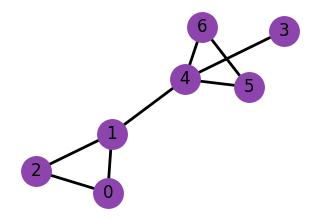

In [507]:
H, n_map = bipartitie_project(G, U)
mpl_draw(H, node_color=NS_PURPLE, node_size=450, edge_color='black', width=2, with_labels=True)

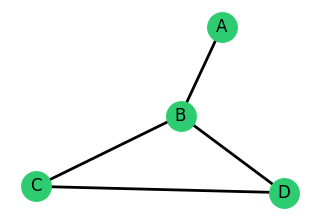

In [515]:
H, n_map = bipartitie_project(G, V)
mpl_draw(H, node_color=NS_GREEN, node_size=450, edge_color='black', width=2, with_labels=True, labels=lambda x: str(x))

In [512]:
for i in H.node_indexes():
    print(f"New index in H = {i}, Old index in G = {n_map[i]}")

New index in H = 0, Old index in G = 7
New index in H = 1, Old index in G = 8
New index in H = 2, Old index in G = 9
New index in H = 3, Old index in G = 10


### 2.8 Paths and Distances
-----------------------------------------------------------

#### 2.8.1 Shortest Paths